## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [86]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
     |████████████████████████████████| 596 kB 6.4 MB/s 
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6496 sha256=e160f65bc628b444ec4e065e484fa7c7f44d73beb26ad5963553219829538ee8
  Stored in directory: /root/.cache/pip/wheels/8d/d6/16/3fd964549d5c27d89d6c5fdb4306283ca55be1799f3d48a67b
Successfully built easydict


## **Importing libraries**

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for coronavirus**

In [88]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.00,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.00,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.00,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.00,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.00,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.00,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.00,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.00,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### **Select and retrieve bioactivity data for *SARS coronavirus 3C-like proteinase* (fifth entry)**

We will assign the fifth entry (which corresponds to the target protein, *coronavirus 3C-like proteinase*) to the ***selected_target*** variable 

In [89]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL3927'

Here, we will retrieve only bioactivity data for *coronavirus 3C-like proteinase* (CHEMBL3927) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [90]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [91]:
df = pd.DataFrame.from_dict(res)

In [92]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [93]:
df['standard_value'] = df['standard_value'].astype(float)

In [94]:
df.to_csv('bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [95]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 20,000 nM will be considered to be **active** while those greater than 20,000 nM will be considered to be **inactive**. 

In [97]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) > 20000:
    bioactivity_class.append("inactive")
  elif float(i) <= 20000:
    bioactivity_class.append("active")


### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [98]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.00
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.00
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.00
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.00


In [100]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,active
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,active
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,active
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.00,active
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.00,active
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.00,active
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.00,active


Saves dataframe to CSV file

In [101]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)

## **Install conda and rdkit**

In [104]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-05-08 18:18:33--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   152MB/s    in 0.5s    

2023-05-08 18:18:34 (152 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    

In [105]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-05-08 18:19:26--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-05-08 18:19:26--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-05-08 18:19:27 (203 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2023-05-08 18:19:27--  https://gi

In [106]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config 

In [107]:
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [108]:
! cat molecule.smi | head -5

Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21	CHEMBL187579
O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21	CHEMBL188487
O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]	CHEMBL187717


In [109]:
! cat molecule.smi | wc -l

133


## **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [110]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [111]:
df4.standard_value.describe()

count       133.00
mean      85967.13
std      158897.32
min          50.00
25%       10100.00
50%       17500.00
75%       70000.00
max     1000000.00
Name: standard_value, dtype: float64

In [112]:
df4.standard_value[0]

7200.0

In [113]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [114]:
df_norm = norm_value(df4)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,2000.00
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,active,10600.00
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,active,10100.00
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,active,11500.00
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,active,10700.00


In [115]:
df_norm.standard_value_norm.describe()

count       133.00
mean      85967.13
std      158897.32
min          50.00
25%       10100.00
50%       17500.00
75%       70000.00
max     1000000.00
Name: standard_value_norm, dtype: float64

In [116]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,5.14
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,5.03
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,4.87
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,4.88
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,5.70
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,active,4.97
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,active,5.00
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,active,4.94
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,active,4.97


In [117]:
df_final.pIC50.describe()

count   133.00
mean      4.72
std       0.92
min       3.00
25%       4.15
50%       4.76
75%       5.00
max       7.30
Name: pIC50, dtype: float64

### **Removing the compounds with infinity values**

Here, we will be removing the compounds with ``infinity`` value from our data set.

In [118]:
df_2class = df_final

# Remove infinity values
df_2class.replace([np.inf, -np.inf], np.nan, inplace=True)
df_2class.dropna(inplace=True)

df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,5.14
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,5.03
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,4.87
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,4.88
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,5.70
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,active,4.97
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,active,5.00
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,active,4.94
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,active,4.97


Let's write this to CSV file.

In [119]:
df_2class.to_csv('coronavirus_bioactivity_data_2class_pIC50.csv')

## **Load bioactivity data**

In [120]:
df3 = pd.read_csv('coronavirus_bioactivity_data_2class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,pIC50
0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,active,5.14
1,1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,active,5.03
2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,4.87
3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,4.88
4,4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],active,5.70
...,...,...,...,...,...
128,128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,active,4.97
129,129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,active,5.00
130,130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,active,4.94
131,131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,active,4.97


In [121]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [122]:
! cat molecule.smi | head -5

Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21	CHEMBL187579
O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21	CHEMBL188487
O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]	CHEMBL187717


In [123]:
! cat molecule.smi | wc -l

133


## **Calculate PaDEL descriptors**

In [124]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [125]:
! bash padel.sh

Processing CHEMBL187579 in molecule.smi (1/133). 
Processing CHEMBL188487 in molecule.smi (2/133). 
Processing CHEMBL185698 in molecule.smi (3/133). Average speed: 3.67 s/mol.
Processing CHEMBL426082 in molecule.smi (4/133). Average speed: 1.95 s/mol.
Processing CHEMBL365134 in molecule.smi (6/133). Average speed: 1.13 s/mol.
Processing CHEMBL187717 in molecule.smi (5/133). Average speed: 1.47 s/mol.
Processing CHEMBL187598 in molecule.smi (7/133). Average speed: 1.02 s/mol.
Processing CHEMBL190743 in molecule.smi (8/133). Average speed: 0.86 s/mol.
Processing CHEMBL365469 in molecule.smi (9/133). Average speed: 0.82 s/mol.
Processing CHEMBL188983 in molecule.smi (10/133). Average speed: 0.76 s/mol.
Processing CHEMBL191575 in molecule.smi (11/133). Average speed: 0.71 s/mol.
Processing CHEMBL370923 in molecule.smi (12/133). Average speed: 0.67 s/mol.
Processing CHEMBL194398 in molecule.smi (13/133). Average speed: 0.71 s/mol.
Processing CHEMBL196635 in molecule.smi (14/133). Average sp

In [126]:
! ls -l

total 217076
-rw-r--r-- 1 root root    10185 May  8 18:18 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    68258 May  8 18:18 bioactivity_data_raw.csv
-rw-r--r-- 1 root root    11850 May  8 18:34 coronavirus_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root   248010 May  8 16:49 coronavirus_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root   247688 May  8 18:35 descriptors_output.csv
-rw-r--r-- 1 root root     1074 May  8 16:46 Drugs.csv
drwxr-xr-x 3 root root     4096 May  8 18:34 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r--r-- 1 root root     7991 May  8 18:34 molecule.smi
drwxrwxr-x 4 root root     4096 May  8 18:34 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 May  8 16:48 padel.sh
-rw-r--r-- 1 root root      231 May  8 18:19 padel.sh.1
-rw-r--r-- 1 root root 25768637 May  8 16:48 padel.zip
-rw-r--r-- 1 ro

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [127]:
df3_X_name = pd.read_csv('descriptors_output.csv')
df3_X_name

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL187579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL188487,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL187717,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,CHEMBL187460,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,CHEMBL363535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,CHEMBL227075,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
df3_X = df3_X_name.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Y variable**

#### **Convert IC50 to pIC50**

In [129]:
df3_Y = df3['pIC50']
df3_Y

0     5.14
1     5.03
2     4.87
3     4.88
4     5.70
      ... 
128   4.97
129   5.00
130   4.94
131   4.97
132   4.10
Name: pIC50, Length: 133, dtype: float64

### **Combining X and Y variable**

In [130]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.14
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.03
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.87
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.88
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.97
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.00
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.94
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.97


In [131]:
dataset3.to_csv('coronavirus_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

## **Testing Drugs**

In [132]:
drugs = pd.read_csv('Drugs.csv')
drugs.columns

Index(['Drug_Bank_Number', 'Drugs', 'canonical_smiles'], dtype='object')

In [133]:
selection = ['canonical_smiles','Drugs']
drugs_selection = drugs[selection]
drugs_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [134]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [135]:
! bash padel.sh

Processing Aminophylline in molecule.smi (1/11). 
Processing Ambroxol in molecule.smi (2/11). 
Processing Theophylline in molecule.smi (3/11). Average speed: 2.09 s/mol.
Processing Amoxicillin in molecule.smi (4/11). Average speed: 1.23 s/mol.
Processing Baloxavir_marboxil in molecule.smi (5/11). Average speed: 0.99 s/mol.
Processing Cefamandole in molecule.smi (6/11). Average speed: 0.93 s/mol.
Processing Cefoxitin in molecule.smi (7/11). Average speed: 0.93 s/mol.
Processing Ceftizoxime in molecule.smi (8/11). Average speed: 0.81 s/mol.
Processing Remdesivir in molecule.smi (10/11). Average speed: 0.76 s/mol.
Processing Cephaloridine in molecule.smi (9/11). Average speed: 0.88 s/mol.
Processing Ciclesonide in molecule.smi (11/11). Average speed: 0.65 s/mol.
Descriptor calculation completed in 7.241 secs . Average speed: 0.66 s/mol.


In [136]:
drugs_X = pd.read_csv('descriptors_output.csv')
drugs_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,Aminophylline,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Theophylline,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ambroxol,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amoxicillin,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cefamandole,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Baloxavir_marboxil,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ceftizoxime,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Cefoxitin,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Cephaloridine,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Remdesivir,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
X_drugs = drugs_X.drop(columns=['Name'])
X_drugs

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#**Building Machine Learning Models using our data**

## **Import libraries**

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **Load the data set**

In [143]:
df = pd.read_csv('coronavirus_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df[df['pIC50'] <= np.finfo(np.float64).max]

### **Input features**

In [144]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Output features**

In [145]:
Y = df.pIC50
Y

0     5.14
1     5.03
2     4.87
3     4.88
4     5.70
      ... 
128   4.97
129   5.00
130   4.94
131   4.97
132   4.10
Name: pIC50, Length: 133, dtype: float64

### **Remove low variance features**

In [148]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    

In [149]:
all = [X,X_drugs]
all = pd.concat(all)
all.shape

(144, 881)

In [150]:
all_transform = selection.fit_transform(all)

In [151]:
X = all_transform[0:len(X)]
X_drugs = all_transform[-len(X_drugs):]

## **Data split (80/20 ratio)**

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =42)

In [153]:
X_train.shape, Y_train.shape

((106, 204), (106,))

In [154]:
X_test.shape, Y_test.shape

((27, 204), (27,))

# **Building a Regression Model using Random Forest**

In [155]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6430459806020283

In [156]:
Y_pred = model.predict(X_test)

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

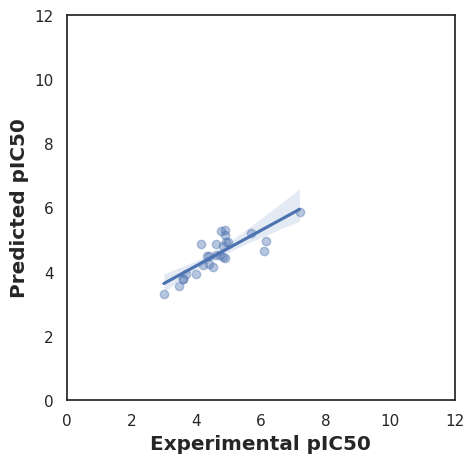

In [157]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **Testing Drugs**

In [158]:
pIC50_drugs = model.predict(X_drugs)
pIC50_drugs = pd.DataFrame(pIC50_drugs,columns=["pIC50"])

In [159]:
result = drugs_X["Name"].to_frame().assign(pIC50 = pIC50_drugs)
result

,Name,pIC50
0,Aminophylline,4.64
1,Theophylline,4.64
2,Ambroxol,5.33
3,Amoxicillin,4.53
4,Cefamandole,4.34
5,Baloxavir_marboxil,4.90
6,Ceftizoxime,4.43
7,Cefoxitin,4.71
8,Cephaloridine,5.97
9,Remdesivir,4.69


# **Comparing different Machine Learning Models**

### **Importing Libraries**

In [160]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

### **Lazy Predictor**

In [162]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:24<00:00,  1.75it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:23<00:00,  1.79it/s]


In [163]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,30679767488621145103796566552375427928689656863...,-2892663791784279600581282008143578602766341840...,15756773564228142997504916169268067282452480.00,0.41
KernelRidge,28.80,-25.22,4.74,0.06
QuantileRegressor,2.06,-0.00,0.93,0.34
LassoLars,2.06,0.00,0.93,0.05
Lasso,2.06,0.00,0.93,0.06
DummyRegressor,2.06,0.00,0.93,0.04
ElasticNet,2.06,0.00,0.93,0.03
LarsCV,1.66,0.38,0.73,1.16
LassoLarsCV,1.41,0.62,0.57,0.10


In [164]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,12524944811982544103672645311328227035640592319...,-8574769909741895771215103922356747955682102581...,81270096978506302887092998182859074538443244310...,0.30
TransformedTargetRegressor,357204763652476895232.00,-2445478766543880323072.00,43401175118.17,0.03
LinearRegression,357204763652476895232.00,-2445478766543880323072.00,43401175118.17,0.03
KernelRidge,5.44,-29.40,4.84,0.05
GaussianProcessRegressor,2.85,-11.69,3.13,0.06
QuantileRegressor,1.15,-0.03,0.89,0.26
LassoLars,1.15,-0.01,0.88,0.03
Lasso,1.15,-0.01,0.88,0.07
ElasticNet,1.15,-0.01,0.88,0.02


## **Data visualization of model performance**

[(0.0, 1.0)]

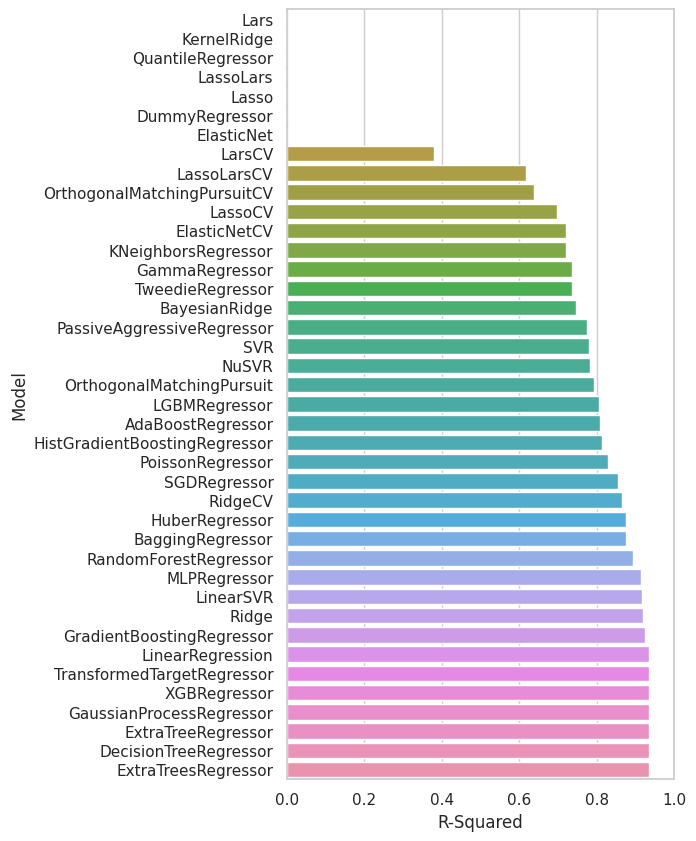

In [165]:
# Bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

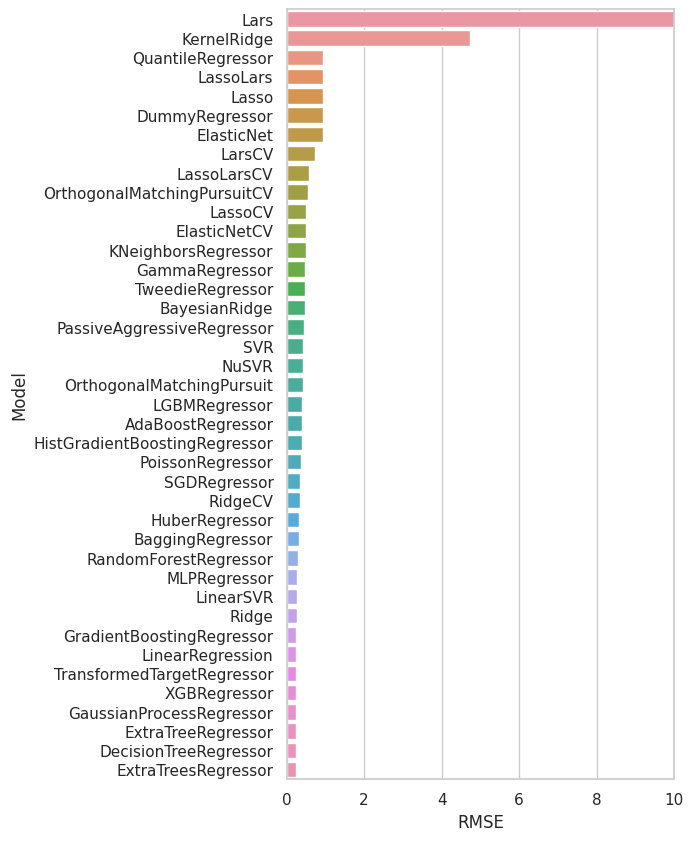

In [166]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

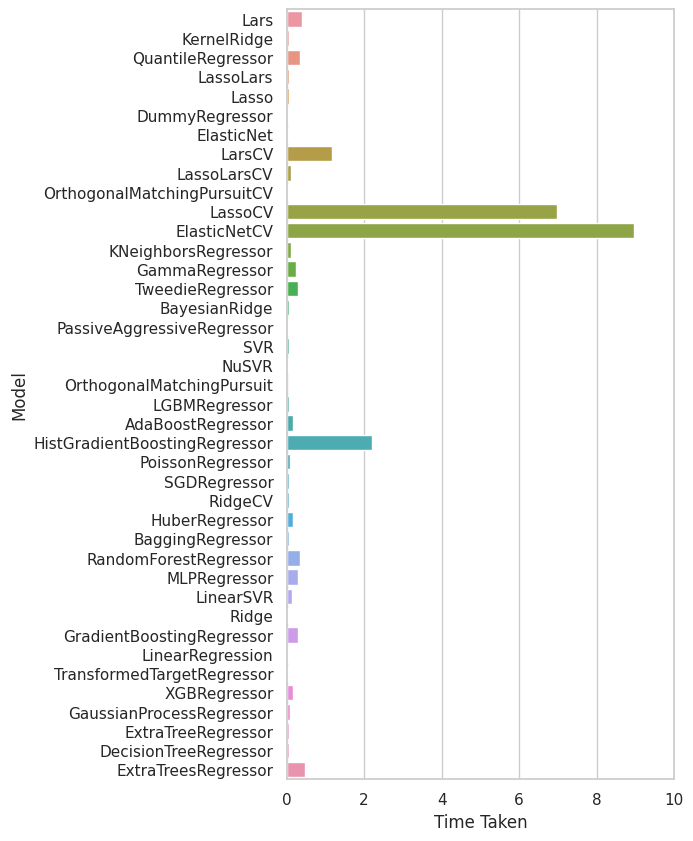

In [167]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

---